In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-01-30 23:46:05.816743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Load the data from the CSV file
df = pd.read_csv('/Users/apple/Downloads/MNIST/mnist_train.csv')

In [23]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Select a single row from the data
image = df.iloc[0, :].values

In [20]:
# Reshape the data into a 28x28 array
image = image[1:].reshape((28, 28))

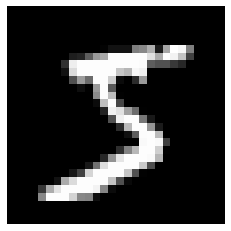

In [21]:
# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
# Define the Inception module
def inception_module(x):
    tower_1 = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    tower_1 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)
    
    tower_2 = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    tower_2 = layers.Conv2D(64, (5, 5), padding='same', activation='relu')(tower_2)
    
    tower_3 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    tower_3 = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)
    
    output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)
    return output

In [5]:
# Build the model
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)

x = inception_module(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs)

2023-01-30 23:46:37.259223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Train the model
model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 474s 1s/step - loss: 0.2391 - accuracy: 0.9265
Epoch 2/3
469/469 [==============================] - 483s 1s/step - loss: 0.0760 - accuracy: 0.9784
Epoch 3/3
469/469 [==============================] - 594s 1s/step - loss: 0.0586 - accuracy: 0.9831


In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 25s - loss: 0.0270 - accuracy: 0.9912 - 25s/epoch - 80ms/step

Test accuracy: 0.9911999702453613
